In [1]:
import os

os.environ["OMP_NUM_THREADS"] = "1"
os.nice(19)

19

In [2]:
import os
from glob import glob
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as pl
from astropy import constants as c
%matplotlib inline

#styling
import seaborn as sns
sns.set_style(style='ticks', rc=None)
sns.set_style({"xtick.direction": "in","ytick.direction": "in"})

matplotlib.rcParams.update({'font.size': 20})
pl.rcParams['ytick.labelsize'] = 'large'
pl.rcParams['xtick.labelsize'] = 'large'
fontsize=20

In [3]:
import batman

In [4]:
params = batman.TransitParams()
params.t0 = 0.                       #time of inferior conjunction
params.per = 1.                      #orbital period
params.rp = 0.1                      #planet radius (in units of stellar radii)
params.a = 15.                       #semi-major axis (in units of stellar radii)
params.inc = 87.                     #orbital inclination (in degrees)
params.ecc = 0.                      #eccentricity
params.w = 90.                       #longitude of periastron (in degrees)
params.u = [0.1, 0.3]                #limb darkening coefficients [u1, u2]
params.limb_dark = "quadratic"       #limb darkening model

In [11]:
t = np.linspace(-0.013, 0.013, 100)
m = batman.TransitModel(params, t)    #initializes model
flux = m.light_curve(params)          #calculates light curve

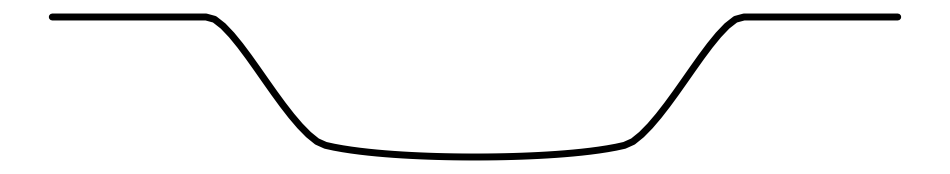

In [12]:
fig, ax = pl.subplots(figsize=(12, 2))

ax.plot(t, flux, lw=5, color='k')
ax.set_xlabel("Time from central transit")
ax.set_ylabel("Relative flux")
ax.axis('off')

ax.set_xticks([])
ax.set_yticks([])
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
fig.savefig('transit_white.png')